# Telecom Customer Churn 

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

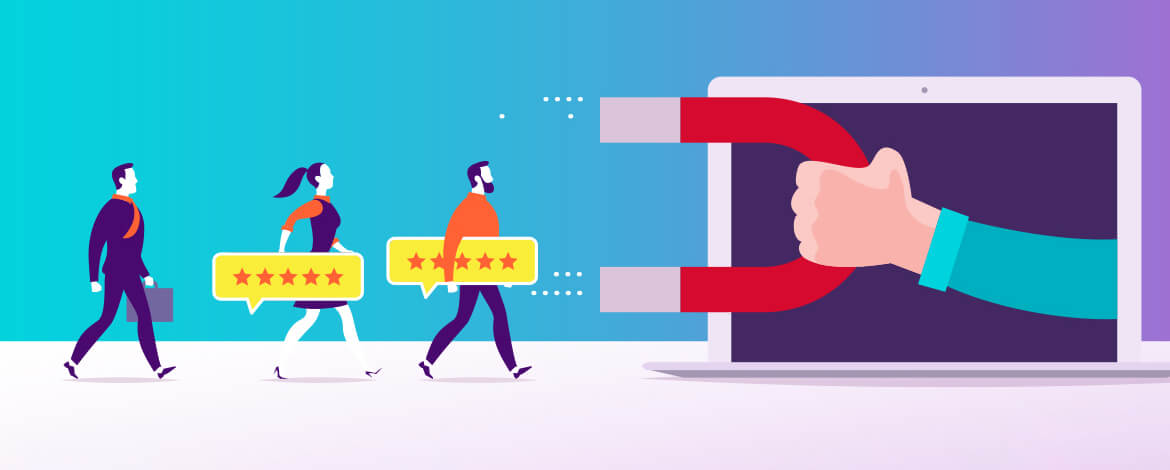

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve 

In [2]:
telecom_cust = pd.read_csv('E:\\Ai trainning\\phase2\\ml 1\\ass2\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telecom_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### summary statistics:

In [4]:
telecom_cust.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
telecom_cust.shape

(7043, 21)

In [6]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Data_inspection:

In [7]:
telecom_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
for col in telecom_cust:
    print(f'column name is "{col}" \n',telecom_cust[col].value_counts())
    print('==='*15)

column name is "customerID" 
 0853-NWIFK    1
0961-ZWLVI    1
2533-TIBIX    1
2957-JIRMN    1
0032-PGELS    1
             ..
2474-BRUCM    1
9040-KZVWO    1
9651-GTSAQ    1
6840-RESVB    1
1096-ADRUX    1
Name: customerID, Length: 7043, dtype: int64
column name is "gender" 
 Male      3555
Female    3488
Name: gender, dtype: int64
column name is "SeniorCitizen" 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
column name is "Partner" 
 No     3641
Yes    3402
Name: Partner, dtype: int64
column name is "Dependents" 
 No     4933
Yes    2110
Name: Dependents, dtype: int64
column name is "tenure" 
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
column name is "PhoneService" 
 Yes    6361
No      682
Name: PhoneService, dtype: int64
column name is "MultipleLines" 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
column na

#### `there are 11 spaces [not defined values]:`

In [9]:
 telecom_cust['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
           ..
309.4       1
1131.2      1
3465.7      1
6019.35     1
7987.6      1
Name: TotalCharges, Length: 6531, dtype: int64

#### `convert TotalCharges feature from 'object' to 'numeric' feature`

In [10]:
## this is numerical but contains some nulls so it leads to be an object
## fill null with Nans and convert to float64
telecom_cust['TotalCharges'] = pd.to_numeric(telecom_cust['TotalCharges'], errors='coerce')      # errors='coerce' ==> will set invalid parsing with as (Nan) 
telecom_cust.isnull().sum().sort_values(ascending=False)

TotalCharges        11
Churn                0
OnlineSecurity       0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
customerID           0
dtype: int64

#### `Removing missing values`

In [11]:
telecom_cust.dropna(inplace = True)

#### `Checking there is Nan`

In [12]:
telecom_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
telecom_cust.info()    # look at dtypes again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

### `check for unique values in object columns`

In [14]:
for col in telecom_cust.columns:
    if telecom_cust[col].dtype=='object':
        print(f'column name is "{col}" \n', telecom_cust[col].unique(),telecom_cust[col].nunique())
        print('==='*15)

column name is "customerID" 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 7032
column name is "gender" 
 ['Female' 'Male'] 2
column name is "Partner" 
 ['Yes' 'No'] 2
column name is "Dependents" 
 ['No' 'Yes'] 2
column name is "PhoneService" 
 ['No' 'Yes'] 2
column name is "MultipleLines" 
 ['No phone service' 'No' 'Yes'] 3
column name is "InternetService" 
 ['DSL' 'Fiber optic' 'No'] 3
column name is "OnlineSecurity" 
 ['No' 'Yes' 'No internet service'] 3
column name is "OnlineBackup" 
 ['Yes' 'No' 'No internet service'] 3
column name is "DeviceProtection" 
 ['No' 'Yes' 'No internet service'] 3
column name is "TechSupport" 
 ['No' 'Yes' 'No internet service'] 3
column name is "StreamingTV" 
 ['No' 'Yes' 'No internet service'] 3
column name is "StreamingMovies" 
 ['No' 'Yes' 'No internet service'] 3
column name is "Contract" 
 ['Month-to-month' 'One year' 'Two year'] 3
column name is "PaperlessBilling" 
 ['Yes' 'No'] 2
column name is "PaymentMet

In [15]:
# Get list of categorical Features 
s = (telecom_cust.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### `count and drop duplicates`

In [16]:
print(telecom_cust.duplicated().sum())
telecom_cust.drop_duplicates(inplace=True)

0


### `return skewness per Numeric feature:`

In [17]:
telecom_cust.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

### Data_visualization:

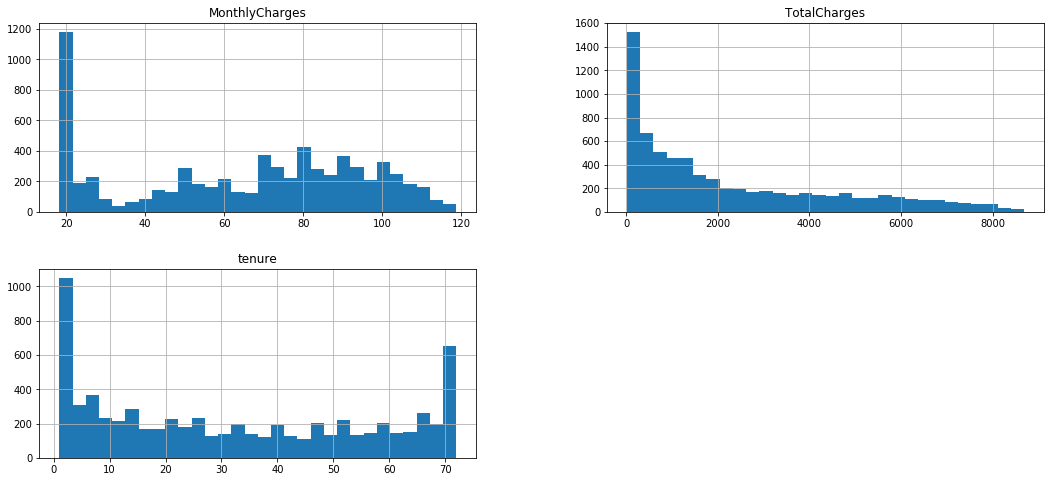

In [18]:
# tenure and MonthlyCharges and TotalCharges historam ditribution
## Note --> i will remove (SeniorCitizen) as it is categorical and encoded not a numerical value to be work on

telecom_cust[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(18, 8));

### `using Box-cox`

Lambda value used for Transformation: 0.25476470723957373


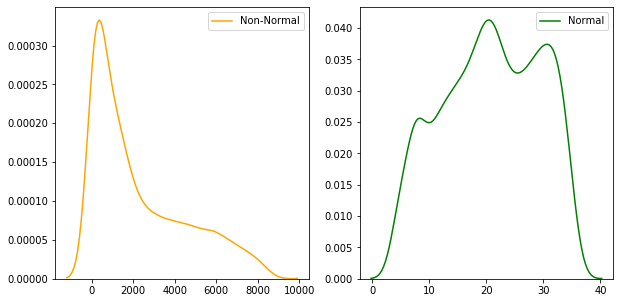

In [19]:
# using Box-cox to transform skewed data to Normal distributed data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

skewed_features = ['TotalCharges']

for i in skewed_features:
    
    original_data = telecom_cust[i]

    # transform training data & save lambda value
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)

    # plotting the original data(non-normal) and 
    # fitted data (normal)
    sns.kdeplot(original_data, label = "Non-Normal", color ="Orange", ax = ax[0])

    sns.kdeplot(fitted_data, label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    telecom_cust[i] = fitted_data          # save changes to dataframe after transformation

### `check skewness & Visualize after conversion`

In [20]:
# To check the skewness after conversion:
telecom_cust['TotalCharges'].skew()

-0.1457578687402694

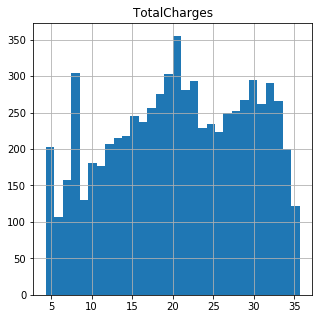

In [21]:
# Visualize histogram of the only skewed feature after conversion:
telecom_cust['TotalCharges'].hist(bins=30, figsize=(5,5))
plt.title('TotalCharges')
plt.show()

### `Detect outliers`

In [22]:
# Detect and Remove outliers with standard deviation:
from numpy.random import seed

seed(1)

data_mean, data_std = np.mean(telecom_cust['TotalCharges']), np.std(telecom_cust['TotalCharges'])

# identify outliers:
cut_off = data_std * 3      # data after [data_std * 3] considered outliers so we remove data after it 
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify & print outliers:
outliers = [x for x in telecom_cust['TotalCharges'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# # remove outliers:
outliers_removed = [x for x in telecom_cust['TotalCharges'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))        # there is no outliers

Identified outliers: 0
Non-outlier observations: 7032


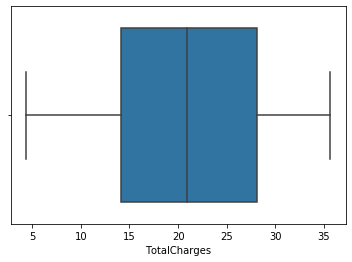

In [23]:
# Visualize Boxplot to check Whether there is outliers:
sns.boxplot(telecom_cust['TotalCharges'])

### `categorical features countplot`

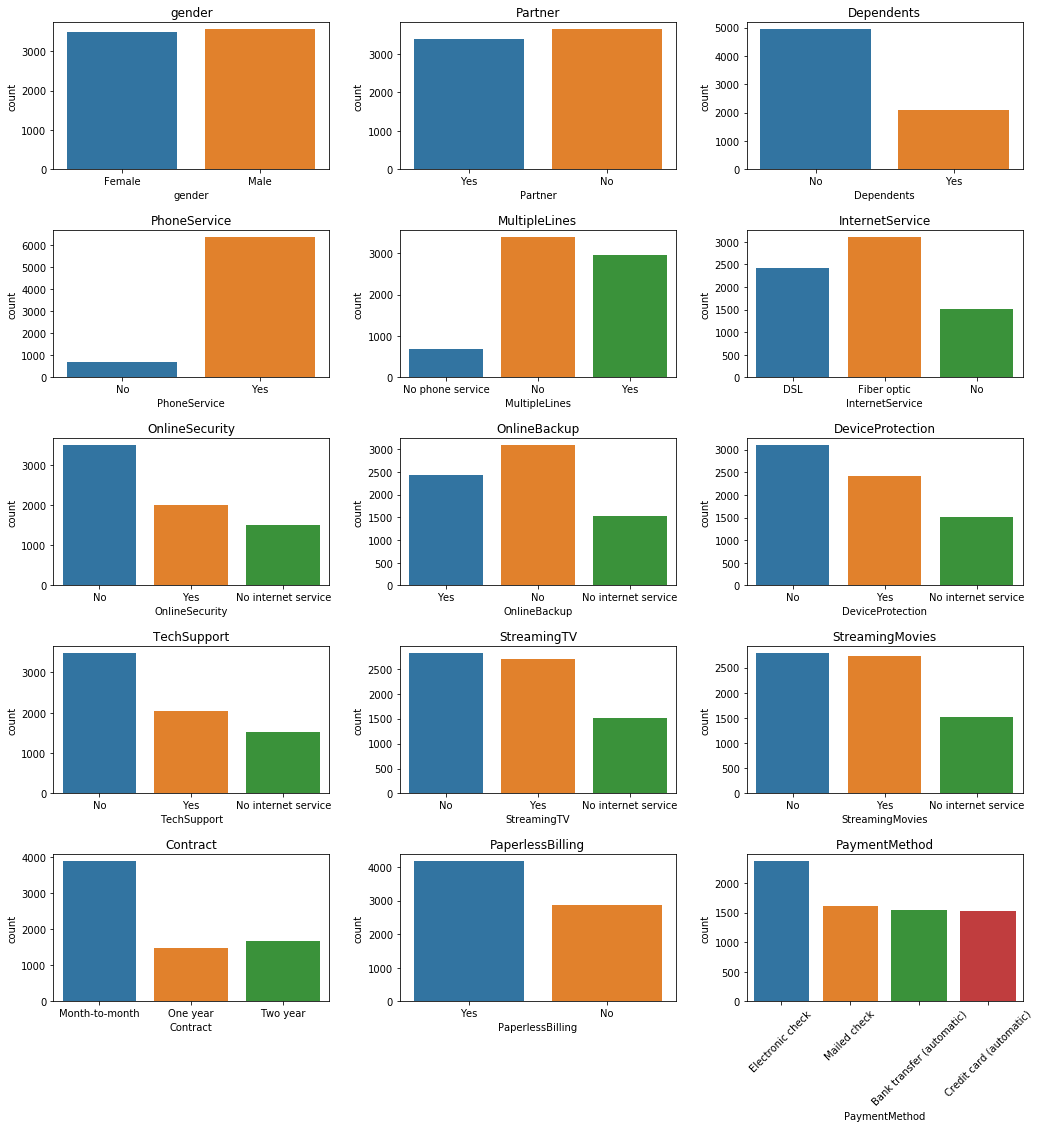

In [24]:
# plotting the countplot for all categorical columns using subplots

fig, ax = plt.subplots(5, 3, figsize=(15, 15))
fig.tight_layout(pad=4)  ## to avoid overlaping of titles in subplots (try comment it you will know)
plt.sca(ax[0,0])
sns.countplot(x='gender', data=telecom_cust)
plt.title('gender')

plt.sca(ax[0,1])
sns.countplot(x='Partner', data=telecom_cust)
plt.title('Partner')

plt.sca(ax[0,2])
sns.countplot(x='Dependents', data=telecom_cust)
plt.title('Dependents')

plt.sca(ax[1,0])
sns.countplot(x='PhoneService', data=telecom_cust)
plt.title('PhoneService')

plt.sca(ax[1,1])
sns.countplot(x='MultipleLines', data=telecom_cust)
plt.title('MultipleLines')

plt.sca(ax[1,2])
sns.countplot(x='InternetService', data=telecom_cust)
plt.title('InternetService')

plt.sca(ax[2,0])
sns.countplot(x='OnlineSecurity', data=telecom_cust)
plt.title('OnlineSecurity')

plt.sca(ax[2,1])
sns.countplot(x='OnlineBackup', data=telecom_cust)
plt.title('OnlineBackup')

plt.sca(ax[2,2])
sns.countplot(x='DeviceProtection', data=telecom_cust)
plt.title('DeviceProtection')

plt.sca(ax[3,0])
sns.countplot(x='TechSupport', data=telecom_cust)
plt.title('TechSupport')

plt.sca(ax[3,1])
sns.countplot(x='StreamingTV', data=telecom_cust)
plt.title('StreamingTV')

plt.sca(ax[3,2])
sns.countplot(x='StreamingMovies', data=telecom_cust)
plt.title('StreamingMovies')

plt.sca(ax[4,0])
sns.countplot(x='Contract', data=telecom_cust)
plt.title('Contract')

plt.sca(ax[4,1])
sns.countplot(x='PaperlessBilling', data=telecom_cust)
plt.title('PaperlessBilling')

plt.sca(ax[4,2])
sns.countplot(x='PaymentMethod', data=telecom_cust)
plt.title('PaymentMethod')
plt.xticks(rotation=45);

### `Using OneHotEncoder`

In [25]:
# Using OneHotEncoder Encoding to convert categrical feature to numerical

import category_encoders as ce

cat_feat = telecom_cust[['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

# Create object from OneHotEncoder:
encoder = ce.OneHotEncoder(cols=cat_feat,handle_unknown='return_nan',return_df=True,use_cat_names=True)

# OneHotEncoder data:
encoder = encoder.fit_transform(telecom_cust)

telecom_cust = encoder

telecom_cust

,customerID,gender_Female,gender_Male,SeniorCitizen,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,tenure,PhoneService_No,...,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1.0,0.0,0,1.0,0.0,1.0,0.0,1,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29.85,5.399287,No
1,5575-GNVDE,0.0,1.0,0,0.0,1.0,1.0,0.0,34,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,56.95,22.900956,No
2,3668-QPYBK,0.0,1.0,0,0.0,1.0,1.0,0.0,2,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,53.85,9.018523,Yes
3,7795-CFOCW,0.0,1.0,0,0.0,1.0,1.0,0.0,45,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42.30,22.722905,No
4,9237-HQITU,1.0,0.0,0,0.0,1.0,1.0,0.0,2,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,70.70,10.182711,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.0,1.0,0,1.0,0.0,0.0,1.0,24,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84.80,23.259217,No
7039,2234-XADUH,1.0,0.0,0,1.0,0.0,0.0,1.0,72,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,103.20,34.010528,No
7040,4801-JZAZL,1.0,0.0,0,1.0,0.0,0.0,1.0,11,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29.60,13.487726,No
7041,8361-LTMKD,0.0,1.0,1,1.0,0.0,1.0,0.0,4,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,74.40,12.953998,Yes


In [26]:
telecom_cust['Churn'].replace(['No', 'Yes'], [0,1], inplace=True)

In [27]:
# Check Datatypes of Features
telecom_cust.dtypes

customerID                                  object
gender_Female                              float64
gender_Male                                float64
SeniorCitizen                                int64
Partner_Yes                                float64
Partner_No                                 float64
Dependents_No                              float64
Dependents_Yes                             float64
tenure                                       int64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No phone service             float64
MultipleLines_No                           float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_No                          float64
OnlineSecurity_Yes                         float64
OnlineSecurity_No internet serv

(4.0, 0.0)

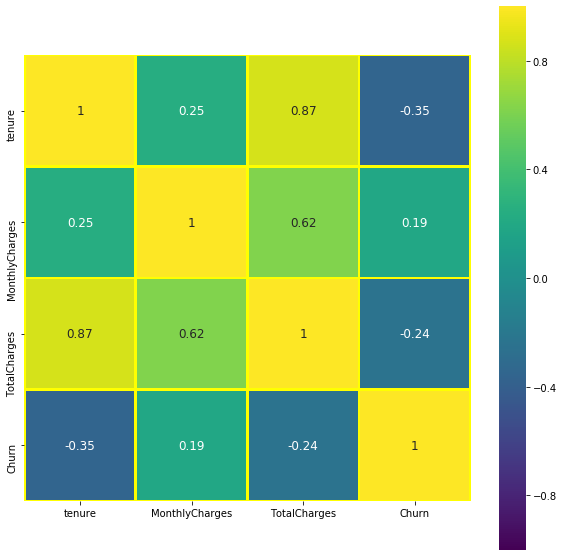

In [28]:
plt.figure(figsize=(10,10))
res = sns.heatmap(telecom_cust[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr("pearson"),vmin = -1,vmax = 1,cmap = 'viridis',annot = True,annot_kws={"fontsize":12},square = True,linewidths=2,linecolor='yellow')
bottom, top = res.get_ylim()

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 10)
res.set_ylim(bottom + 0.5, top - 0.5)

In [29]:
telecom_cust.drop('customerID',inplace = True, axis=1)

### Split data:

In [30]:
x = telecom_cust.iloc[:, :-1]
print(x)
y = telecom_cust['Churn']
print(y)

      gender_Female  gender_Male  SeniorCitizen  Partner_Yes  Partner_No  \
0               1.0          0.0              0          1.0         0.0   
1               0.0          1.0              0          0.0         1.0   
2               0.0          1.0              0          0.0         1.0   
3               0.0          1.0              0          0.0         1.0   
4               1.0          0.0              0          0.0         1.0   
...             ...          ...            ...          ...         ...   
7038            0.0          1.0              0          1.0         0.0   
7039            1.0          0.0              0          1.0         0.0   
7040            1.0          0.0              0          1.0         0.0   
7041            0.0          1.0              1          1.0         0.0   
7042            0.0          1.0              0          0.0         1.0   

      Dependents_No  Dependents_Yes  tenure  PhoneService_No  \
0               1.0    

In [31]:
# Split data:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
# scalling train data:

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

### LogisticRegression

In [33]:
LR = LogisticRegression(random_state=42, n_jobs=-1)
LR.fit(x_train, y_train)
y_pre = LR.predict(x_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, LR.predict(x_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8131555555555555
Accuracy_score on test :  0.7995735607675906


In [34]:
# Logistic Regression after scaled data:

LR = LogisticRegression(random_state=42, n_jobs=-1, C=0.009, max_iter=7000)
LR.fit(x_train_scaler, y_train)
y_pre = LR.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, LR.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8115555555555556
Accuracy_score on test :  0.7931769722814499


 TN: 932 
 FP: 101 
 FN: 190 
 TP: 184
***********************************
Recall Accuracy:  0.4919786096256685
***********************************
Precision Accuracy:  0.6456140350877193
***********************************
f1 score:  0.5584218512898331
***********************************
AUC:  0.7803785247267966
***********************************


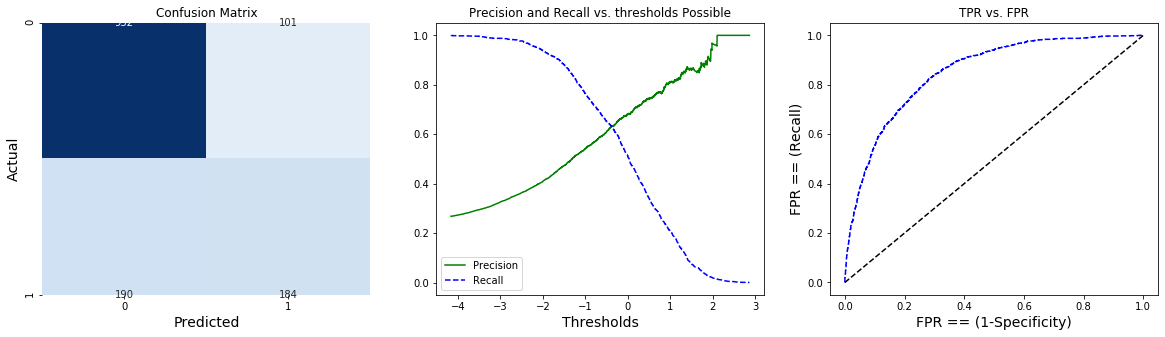

In [35]:
def decision_func(model):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    ## Confusion Matrix
    confus_model = confusion_matrix(y_test, y_pre)

    # plot it
    plt.sca(ax[0])
    sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
    print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
    print('*******'*5)
    print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
    print('*******'*5)
    print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
    print('*******'*5)
    print( 'f1 score: ', f1_score(y_test, y_pre) )


    # for precision_recall curve
    y_decision_cross = cross_val_predict(model, x_train, y_train, 
                                     cv=6, method='decision_function', n_jobs=-1)

    precision_val, recalls_val, thresholds_vals = precision_recall_curve(y_train, 
                                                                      y_decision_cross)

    ## roc_auc curve
    fpr, tpr, thresholds = roc_curve(y_train, y_decision_cross)
    print('*******'*5) 
    print('AUC: ', roc_auc_score(y_test.values, model.predict_proba(x_test)[:, 1], multi_class='ovr'))
    print('*******'*5)


    # plot precison_recall curve
    plt.sca(ax[1])
    plt.plot(thresholds_vals, precision_val[:-1], 'g-', label='Precision')
    plt.plot(thresholds_vals, recalls_val[:-1], 'b--', label='Recall')
    plt.title('Precision and Recall vs. thresholds Possible')
    plt.xlabel('Thresholds', fontsize=14)
    plt.legend()

    ## plot roc_curve
    plt.sca(ax[2])
    plt.plot(fpr, tpr, 'b--')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('TPR vs. FPR')
    plt.xlabel('FPR == (1-Specificity)', fontsize=14)
    plt.ylabel('FPR == (Recall)', fontsize=14)
    plt.show()

decision_func(LR)

In [36]:
def predict_proba_func(model):
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    ## Confusion Matrix
    confus_model = confusion_matrix(y_test, y_pre)

    # plot it
    plt.sca(ax[0])
    sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
    print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
    print('*******'*5)
    print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
    print('*******'*5)
    print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
    print('*******'*5)
    print( 'f1 score: ', f1_score(y_test, y_pre) )


    # for precision_recall curve
    y_decision_cross = cross_val_predict(model, x_train, y_train, 
                                     cv=6, method='predict_proba', n_jobs=-1)

    precision_val, recalls_val, thresholds_vals = precision_recall_curve(y_train, 
                                                                      y_decision_cross[:,1])

    ## roc_auc curve
    fpr, tpr, thresholds = roc_curve(y_train, y_decision_cross[:,1])
    print('*******'*5) 
    print('AUC: ', roc_auc_score(y.values, model.predict_proba(x)[:, 1], multi_class='ovr'))
    print('*******'*5)


    # plot precison_recall curve
    plt.sca(ax[1])
    plt.plot(thresholds_vals, precision_val[:-1], 'g-', label='Precision')
    plt.plot(thresholds_vals, recalls_val[:-1], 'b--', label='Recall')
    plt.title('Precision and Recall vs. thresholds Possible')
    plt.xlabel('Thresholds', fontsize=14)
    plt.legend()

    ## plot roc_curve
    plt.sca(ax[2])
    plt.plot(fpr, tpr, 'b--')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('TPR vs. FPR')
    plt.xlabel('FPR == (1-Specificity)', fontsize=14)
    plt.ylabel('FPR == (Recall)', fontsize=14)
    plt.show()


# Decision Tree

In [37]:
# Using decision Tree Classifer

DT = DecisionTreeClassifier(max_depth=5, random_state=42)
DT.fit(x_train, y_train)
y_pre = DT.predict(x_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, DT.predict(x_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8058666666666666
Accuracy_score on test :  0.775408670931059


In [38]:
# Using decision Tree Classifer after scale data

DT = DecisionTreeClassifier(max_depth=6)
DT.fit(x_train_scaler, y_train)
y_pre = DT.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, DT.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.816
Accuracy_score on test :  0.7732764747690121


 TN: 877 
 FP: 156 
 FN: 163 
 TP: 211
***********************************
Recall Accuracy:  0.5641711229946524
***********************************
Precision Accuracy:  0.5749318801089919
***********************************
f1 score:  0.5695006747638326
***********************************
AUC:  0.643750906121229
***********************************


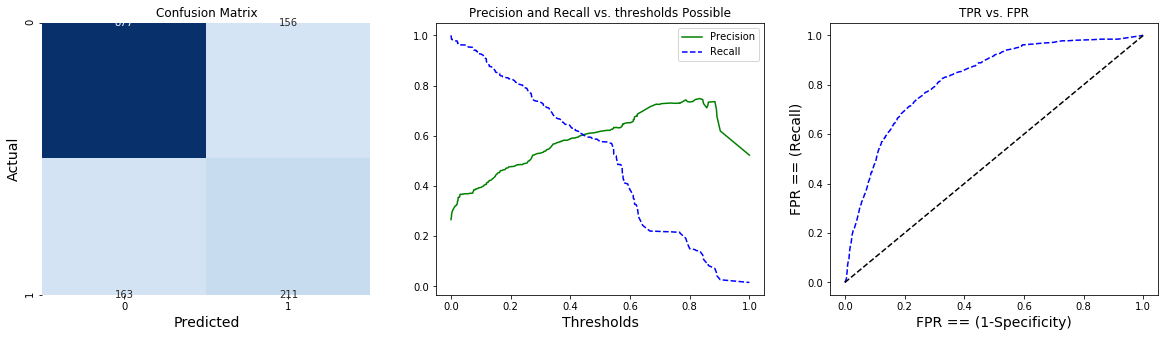

In [39]:
# call predict_proba_func 
predict_proba_func(DT)

### Training the model(Random Forest)

In [40]:
RF = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
RF.fit(x_train, y_train)
y_pre = RF.predict(x_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, RF.predict(x_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8188444444444445
Accuracy_score on test :  0.7846481876332623


In [41]:
# Using Random Forest after scale data

RF = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
RF.fit(x_train_scaler, y_train)
y_pre = RF.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, RF.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8190222222222222
Accuracy_score on test :  0.7846481876332623


 TN: 938 
 FP: 95 
 FN: 208 
 TP: 166
***********************************
Recall Accuracy:  0.44385026737967914
***********************************
Precision Accuracy:  0.6360153256704981
***********************************
f1 score:  0.5228346456692913
***********************************
AUC:  0.8077608952949262
***********************************


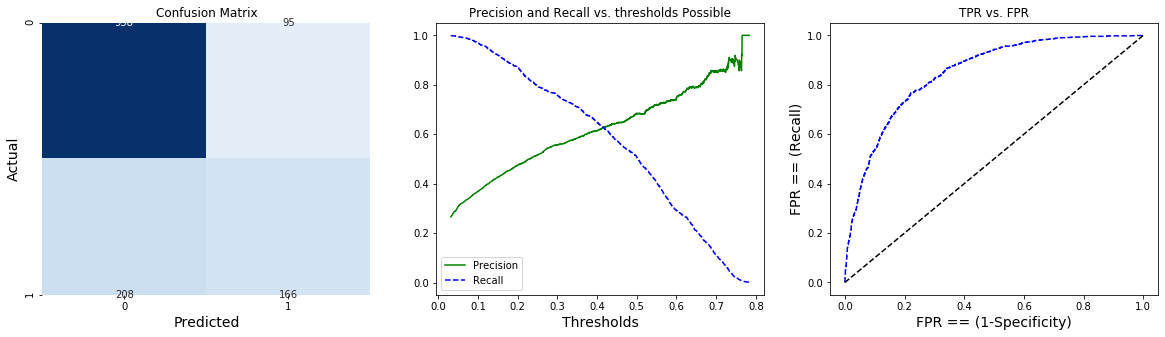

In [42]:
# call predict_proba_func 
predict_proba_func(RF)

In [43]:
RF.feature_importances_

array([0.0017722 , 0.00180261, 0.00593189, 0.00243497, 0.0023985 ,
       0.0040474 , 0.00396041, 0.13666889, 0.00182168, 0.00140235,
       0.00139484, 0.00284546, 0.00400746, 0.02676814, 0.07099483,
       0.00814292, 0.08658005, 0.01939163, 0.00915651, 0.00414559,
       0.02142197, 0.00639386, 0.01143407, 0.00249656, 0.00875251,
       0.06728929, 0.01667786, 0.00770674, 0.00327747, 0.00365528,
       0.00820796, 0.00338328, 0.0041799 , 0.00931667, 0.1567011 ,
       0.02165067, 0.04131232, 0.00588749, 0.00629475, 0.04543529,
       0.00197328, 0.00211804, 0.00400111, 0.05364361, 0.09112059])